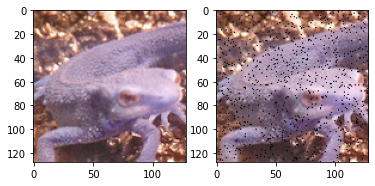

In [11]:
import cv2   # openCV  BGR顺序
import matplotlib.pyplot as plt   # openCV  RGB顺序
import numpy as np

# Read image
img = cv2.imread("../imori.jpg")  
img_noise = cv2.imread("../imori_noise.jpg")

plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_noise)
plt.show()

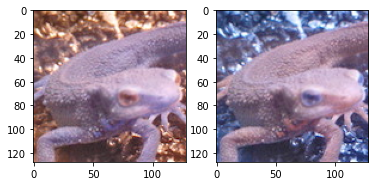

In [7]:
# Q1 通道交换（BGR -> RGB）？？？？？？？？？？？？？？？？？？？？？
def BGR2RGB(img):
    new_img = np.zeros(img.shape, dtype=int)
    
    new_img[:,:,0] = img[:,:,2]
    new_img[:,:,1] = img[:,:,1]
    new_img[:,:,2] = img[:,:,0]
   

    return new_img

img1 = BGR2RGB(img)


#save and display
cv2.imwrite('../answer_img_python/answer_img1.jpg',img1)
plt.figure("通道交换（BGR -> RGB）")
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img1)
plt.show()



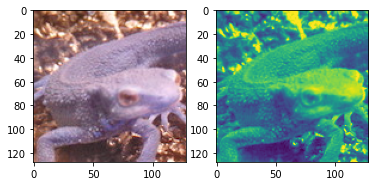

In [5]:
# Q2 灰度化（Grayscale） Y = 0.2126 R + 0.7152 G + 0.0722 B
def grayscale(img):
    new_img = np.zeros(img.shape[:2])
    
    h,w = img.shape[:2]
    
    for i in range(0,h):
        for j in range(0,w):
            gray = 0.2126 * img[i,j,0] + 0.7152 * img[i,j,0] + 0.0722 * img[i,j,0]
            new_img[i,j] = gray
    
    return new_img

img2 = grayscale(img)

#save and display
cv2.imwrite('../answer_img_python/answer_img2.jpg',img2)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2)
plt.show()

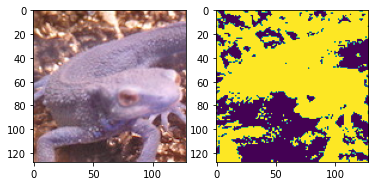

In [104]:
# Q3 二值化（Thresholding）  阈值设为128
def thresholding(img, threshold):
    new_img = np.zeros(img.shape)
    
    h,w = img.shape[:2]
    for i in range(h):
        for j in range(w):      
            if img[i,j] < threshold:
                new_img[i,j] = 0
            else:
                 new_img[i,j] = 1
    
    return new_img

img3 = thresholding(img2,128)

#save and display
cv2.imwrite('../answer_img_python/answer_img3.jpg',img3)
plt.figure("二值化（Thresholding）")
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img3)
plt.show()

In [ ]:
# Q4 大津二值化算法（Otsu's Method）
"""?????????????????????
亦称为最大类间方差法，是一种可自动确定二值化中间值的算法，从类内方差和类间方差的比值计算得来：
小于阈值1的类记作0，大于阈值t的类记作1
w0和w1是被阈值t分开的两个类中的像素数占总像素数的比率
s0^2和s1^2是这两个类中像素值的方差
M0、M1是这两个类的像素值的平均值
"""

def otsu(img):
    gray_img = grayScale(img)
    values = np.aslist(gray_img)
    
    
        
img4 = otsu(img)

#save and display
cv2.imwrite('../answer_img_python/answer_img4.jpg',img4)
plt.figure("大津二值化算法")
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img4)
plt.show()

In [105]:
# Q5 HSV 变换
"""??????????????????????????????
色相（Hue）：(0-360度) R0、360  G120  B240
饱和度（Saturation）:[0,1)淡->浓
明度（Value）:[0,1)黑->rgb
"""
def RGB2HSV(img):
    
    
img5 = RGB2HSV(img)

#save and display
cv2.imwrite('../answer_img_python/answer_img5.jpg',img5)
plt.figure("HSV变换")
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img5)
plt.show()

IndentationError: expected an indented block (<ipython-input-105-07e9a6b9f2c6>, line 10)

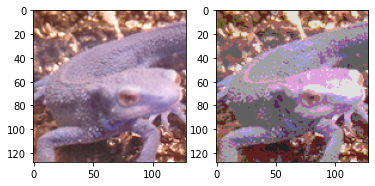

In [6]:
# Q6 减色处理  ?????????
"""
色彩量化
"""

def reduceValue(img, num): # 值的数量
    
    new_img = np.zeros(img.shape, dtype=int)
    
    # 可选值
    values = []
    for i in range(num):
        values.append(((256 // num) * (i + (i+1)) )//2)
    
    # 计算值
    h,w = img.shape[:2]
    for i in range(h):
        for j in range(w):
            for k in range(3):
               
                new_img[i,j,k] = values[img[i,j,k] // (256//num)]
   
    return new_img

img6 = reduceValue(img,4)
 
#save and display
cv2.imwrite('../answer_img_python/answer_img6.jpg',img6)
plt.figure("减色处理")
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img6)
plt.show()

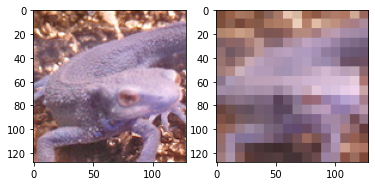

In [7]:
# Q7 平均池化（Average Pooling） 


def averagePooling(img):  
    new_img = np.zeros(img.shape, dtype=int)
    values = []
    
    h,w = img.shape[:2]
    i = 0 
    while(i<h):
        j = 0
        while(j<w):
            for k in range(3):
                v = np.sum(img[i:i+8, j:j+8, k])//64
                new_img[i:i+8, j:j+8, k] = v
            
            j += 8
        
        i += 8
    
    return new_img
        
                    
img7 = averagePooling(img)

#save and display
cv2.imwrite('../answer_img_python/answer_img7.jpg',img7)
plt.figure("平均池化")
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img7)
plt.show()
    

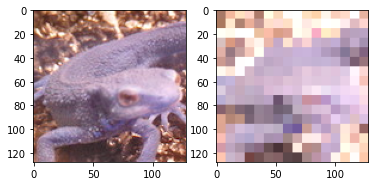

In [8]:
# Q8 最大池化（Max Pooling）

def maxPooling(img):
    new_img = np.zeros(img.shape, dtype=int)
    
    h,w = img.shape[:2]
    i = 0
    while(i < h):
        j = 0 
        while(j < w):
            for k in range(3):
                max_v = np.max(img[i:i+8, j:j+8, k])
                new_img[i:i+8, j:j+8, k] = max_v
            j += 8
        i += 8
    
    return new_img

img8 = maxPooling(img)

#save and display
cv2.imwrite('../answer_img_python/answer_img8.jpg',img8)
plt.figure("最大池化")
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img8)
plt.show()

    

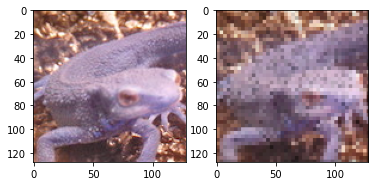

In [9]:
# Q9 高斯滤波（Gaussian Filter） 

def gaussianFilter(img_noise):
    new_img = np.zeros(img_noise.shape, dtype=int)  # [0..1] for floats or [0..255] for integers
    
    # 填充
    h,w = img_noise.shape[:2]
    padding_img = np.zeros([h+1,w+1,3])
    padding_img[:h,:w,:] = img_noise[:,:,:]
    
    # 高斯滤波
    i = 1 
    while(i < h):
        j = 1
        while(j < w):
            for k in range(3):
                v = np.sum(padding_img[i-1:i+2, j-1:j+2, k] * [[1,2,1],[2,4,2],[1,2,1]]//16)
                padding_img[i-1:i+2, j-1:j+2, k] = v
            j += 3
        i += 3
        
    new_img[:,:,:] = padding_img[:h, :w, :]
    
    return new_img

img9 = gaussianFilter(img_noise)

#save and display
cv2.imwrite('../answer_img_python/answer_img9.jpg',img9)
plt.figure("高斯滤波")
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img9)
plt.show()

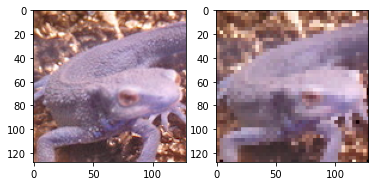

In [10]:
# Q10 中间值滤波(Median Filter)

def medianFilter(img_noise):
    new_img = np.zeros(img_noise.shape, dtype=int)
    
    # 填充
    h,w = img_noise.shape[:2]
    padding_img = np.zeros([h+1, w+1, 3])
    padding_img[:h, :w, :] = img_noise[:,:,:]
    
    # 中间值滤波
    i = 1
    while(i < h):
        j = 1
        while(j < w):
            for k in range(3):
                v = np.median(padding_img[i-1:i+2, j-1:j+2, k])
                padding_img[i-1:i+2, j-1:j+2, k] = v
            j += 3
        i += 3
    
    new_img[:, :, :] = padding_img[:h, :w, :]
    
    return new_img
    
img10 = medianFilter(img_noise)

#save and display
cv2.imwrite('../answer_img_python/answer_img10.jpg',img10)
plt.figure("中间值滤波")
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img10)
plt.show()
        